# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./SinusRhythmLabels.png">

## Экстрасистолы
Пример:

<img src="./Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg200_samples.csv
* ecg208_samples.csv
* ecg231_samples.csv

Разметка комплексов представлена в файлах:
* ecg200_labels.csv
* ecg208 - разметки нет
* ecg231_labels.csv

Модель строится отдельно для каждого файла *samples.csv*

# Шаг 1 - Загрузка данных

см https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [2]:
import pandas

ecg_200_data = pandas.read_csv('ecg_data/ecg200_samples.csv', sep='\t', header=None)
ecg_208_data = pandas.read_csv('ecg_data/ecg208_samples.csv', sep='\t', header=None)
ecg_231_data = pandas.read_csv('ecg_data/ecg231_samples.csv', sep='\t', header=None)

### Шаг 1.1(Опционально) - Подготовка данных (нормализация)

array / max(array), array - matrix row

# Шаг 2 - Загрузка разметки

In [3]:
ecg_200_labels = pandas.read_csv('ecg_data/ecg200_labels.csv', sep='\t', header=None)
ecg_231_labels = pandas.read_csv('ecg_data/ecg231_labels.csv', sep='\t', header=None)

def to_zeros(labels, symbol):
    labels_zeros = []
    for index, row in labels.iterrows():
        if (row[0] == symbol):
            labels_zeros.append(0)
        else:
            labels_zeros.append(1)
    return labels_zeros

def to_list(one_column_data_frame):
    rez = []
    for index, row in one_column_data_frame.iterrows():
        rez.append(row[0])
    return rez

# ecg_200_labels

# Шаг 3 - Кластеризация комплексов

см: 
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [38]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

kmeans_00 = KMeans(n_clusters=2, random_state=0).fit(ecg_200_data)
kmeans_08 = KMeans(n_clusters=2, random_state=0).fit(ecg_208_data)
kmeans_31 = KMeans(n_clusters=2, random_state=0).fit(ecg_231_data)

agglo_clust_00 = AgglomerativeClustering(n_clusters=2).fit(ecg_200_data)
agglo_clust_08 = AgglomerativeClustering(n_clusters=2).fit(ecg_208_data)
agglo_clust_31 = AgglomerativeClustering(n_clusters=2).fit(ecg_231_data)

dbscan_00 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_200_data)
dbscan_08 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_208_data)
dbscan_31 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_231_data)

# Шаг 4 - Визуализация полученного разбиения:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def labels_to_dict(lables):
    rez = {}
    unique_labels = list(set(lables.tolist()))
    for i in range(0, len(unique_labels)):
        rez[unique_labels[i]] = i
    return rez

def printEcg(data, title):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)

    for i in np.arange(0, line_count):
        plt.plot(x, data.iloc[i])
    plt.title(title)    
    
def print_ecgs(datas, titles):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        printEcg(datas[i], titles[i])
    plt.show()
    
def print_predict(algo, data, title, algo_name):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)
    y = algo.labels_
    lables_dict = labels_to_dict(y)
    # сгенерируем цвета для dbscan
    colors = []
    if (algo_name == 'dbscan'):
        for i in range(0, len(lables_dict)):
            colors.append(np.random.rand(3,))
    n_clusters_ = len(set(y)) - (1 if -1 in y else 0)
    for i in np.arange(0, line_count):
        if (algo_name == 'dbscan'):
            if (y[i] == -1):
                plt.plot(x, data.iloc[i], c='y') # шум в dbscan будет желтым
            else:
                plt.plot(x, data.iloc[i], c=colors[lables_dict[y[i]]])
        else:
            if (y[i] == 0):
                plt.plot(x, data.iloc[i], c='c')
            else:
                plt.plot(x, data.iloc[i], c='k')
    plt.title(title + '_predict' + '_' + algo_name + '_clusters_' + str(n_clusters_))
    
def print_predicts(algos, datas, titles, algo_name):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        print_predict(algos[i], datas[i], titles[i], algo_name)
    plt.show()

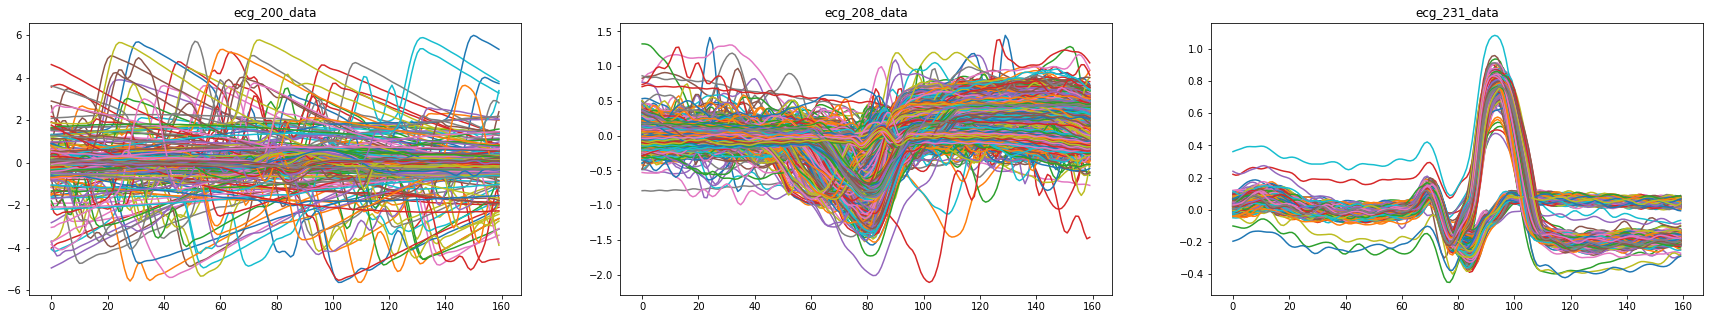

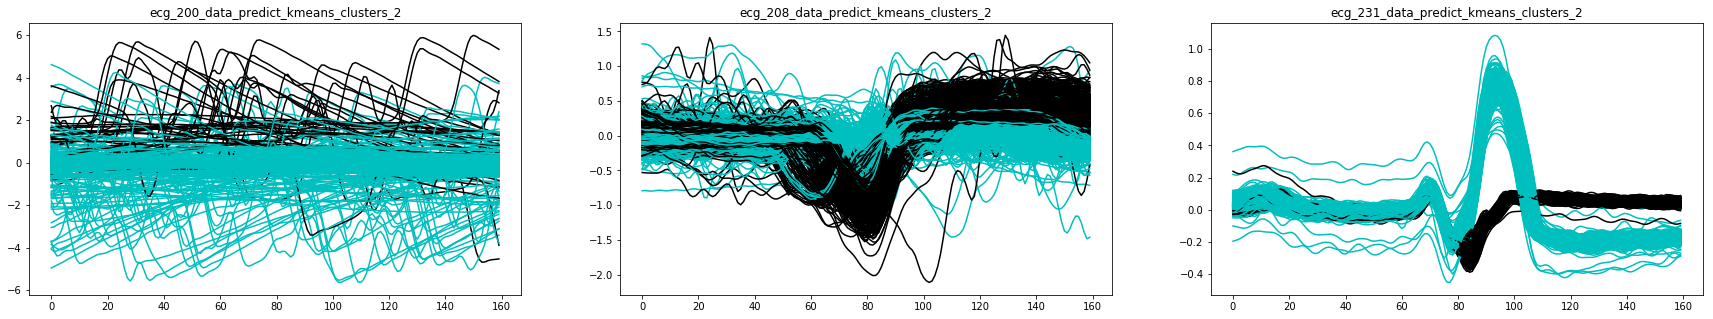

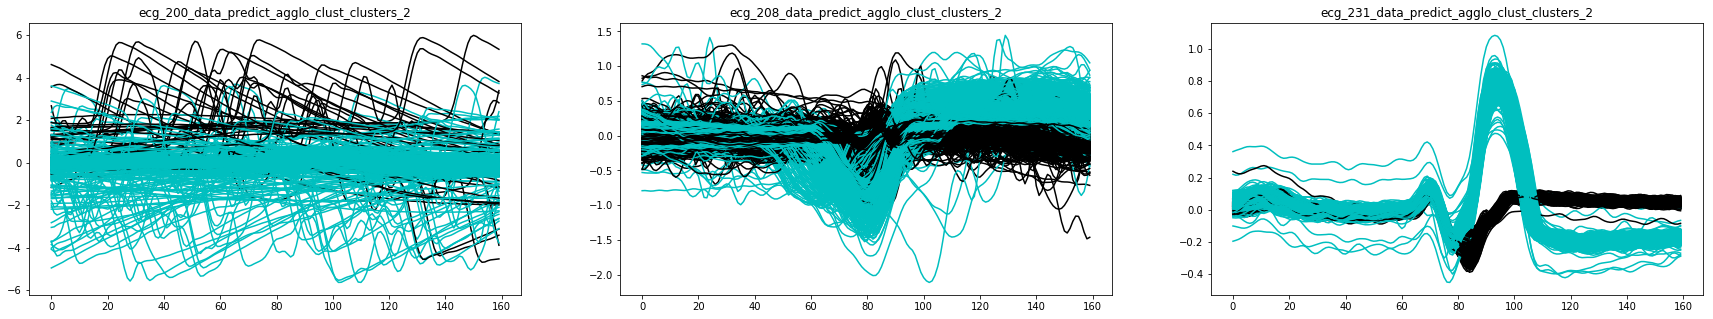

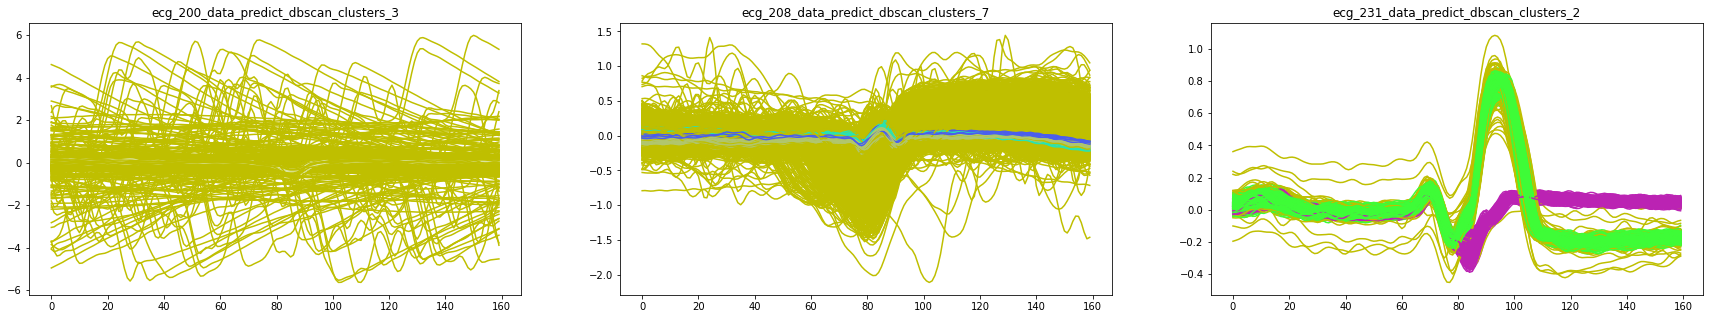

In [7]:
print_ecgs(
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data']
)
# формат имени: [имя данных]_predict_[имя алгоритма]_clusters_[количество кластеров в разбиении]
print_predicts(
    [kmeans_00, kmeans_08, kmeans_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'kmeans'
)
print_predicts(
    [agglo_clust_00, agglo_clust_08, agglo_clust_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'agglo_clust'
)
print_predicts(
    [dbscan_00, dbscan_08, dbscan_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'dbscan'
)

# Шаг 5 - Оценка качества работы выбранных алгоритмов 

В записимости от исходных данных выбираем метрики.

см:
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

In [16]:
import pandas as pd 
from sklearn import metrics

def dict_for_algo(algo, data, ecg_labels):
        rez = {}
        labels = algo.labels_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        rez['estimate_clusters'] = n_clusters_
        rez['silhouette_avg'] = metrics.silhouette_score(data, labels)
        if (ecg_labels is not None):
            labels_true = to_list(ecg_labels)
            rez['homogeneity'] = metrics.homogeneity_score(labels_true, labels)
            rez['completeness'] = metrics.completeness_score(labels_true, labels) 
            rez['v_measure'] = metrics.v_measure_score(labels_true, labels) 
        return rez

def metrix_dict(data, kmeans, agglo_clust, dbscan, ecg_labels=None):    
    rez = {}
    rez['kmeans'] = dict_for_algo(kmeans, data, ecg_labels)
    rez['agglo_clust'] = dict_for_algo(agglo_clust, data, ecg_labels)
    rez['dbscan'] = dict_for_algo(dbscan, data, ecg_labels)
    return rez

metrix_00 = metrix_dict(ecg_200_data, kmeans_00, agglo_clust_00, dbscan_00, ecg_200_labels)
metrix_08 = metrix_dict(ecg_208_data, kmeans_08, agglo_clust_08, dbscan_08, None)
metrix_31 = metrix_dict(ecg_231_data, kmeans_31, agglo_clust_31, dbscan_31, ecg_231_labels)

df_00 = pd.DataFrame(data=metrix_00)
df_08 = pd.DataFrame(data=metrix_08)
df_31 = pd.DataFrame(data=metrix_31)

# silhouette_avg = [-1, 1]
# homogeneity = [0, 1]
# completeness = [0, 1]
# v_measure = [0, 1]

In [17]:
print('ecg_200_data')
df_00
# видим, что полохо разделили, так как homogeneity, completeness, v_measure - низкие
# но silhouette_avg достаточно высокий

ecg_200_data


,agglo_clust,dbscan,kmeans
completeness,0.002316,0.236014,0.002864
estimate_clusters,2.000000,3.000000,2.000000
homogeneity,0.000247,0.461978,0.000313
silhouette_avg,0.873699,0.018005,0.865029
v_measure,0.000447,0.312420,0.000565


In [14]:
print('ecg_208_data')
df_08
# dbscan разделил хуже всех - очень много шума

ecg_208_data


,agglo_clust,dbscan,kmeans
estimate_clusters,2.000000,7.000000,2.00000
silhouette_avg,0.573529,-0.320916,0.57909


In [15]:
print('ecg_231_data')
df_31
# хорошо разделили данные. Все показатели высокие.
# Их было легко разделить, даже при визуализации.
# agglo_clust и kmeans дали одинаковые результаты

ecg_231_data


,agglo_clust,dbscan,kmeans
completeness,0.989659,0.681596,0.989659
estimate_clusters,2.000000,2.000000,2.000000
homogeneity,0.991402,0.978976,0.991402
silhouette_avg,0.815674,0.461087,0.815674
v_measure,0.990530,0.803658,0.990530


# Шаг 6 - Подбор параметров для алгоритмов кластеризации
- число кластеров
- функция расстояния
- и т.д.

In [30]:
# Подбор параметров для KMeans

params = {
  'n_clusters': [2, 5, 10]
}

def kmeans_rez(data, params, y = None):
    scores = {}
    for c in params['n_clusters']:
        kmeans = KMeans(n_clusters=c, random_state=0).fit(data)
        scores['n_clusters_' + str(c)] = dict_for_algo(kmeans, data, y)
    return scores;

# Если сравнивать silhouette_avg=0.865, то лучше всего 2 кластера, но с использованием размеченных данных v_measure=0.301, то лучше 10 кластеров.
print(kmeans_rez(ecg_200_data, params, ecg_200_labels))

# Здесь можем сравнить только по silhouette_avg=0.579 - лучшее для 2 кластеров
print(kmeans_rez(ecg_208_data, params, None))

# Здесь лучше всего сравнить по v_measure=0.991 с большим отрывом лидирует 2 кластера
print(kmeans_rez(ecg_231_data, params, ecg_231_labels))

{'n_clusters_2': {'completeness': 0.0028642950764512036, 'estimate_clusters': 2, 'silhouette_avg': 0.8650287599216048, 'homogeneity': 0.0003133917840986063, 'v_measure': 0.0005649685344002611}, 'n_clusters_5': {'completeness': 0.29703319088681124, 'estimate_clusters': 5, 'silhouette_avg': 0.612182856712227, 'homogeneity': 0.2859281243616863, 'v_measure': 0.2913748851661956}, 'n_clusters_10': {'completeness': 0.289285456795048, 'estimate_clusters': 10, 'silhouette_avg': 0.613933569204669, 'homogeneity': 0.3138836660916485, 'v_measure': 0.3010829841264396}}
{'n_clusters_2': {'estimate_clusters': 2, 'silhouette_avg': 0.5790897482921714}, 'n_clusters_5': {'estimate_clusters': 5, 'silhouette_avg': 0.31778036196168935}, 'n_clusters_10': {'estimate_clusters': 10, 'silhouette_avg': 0.25687134733411476}}
{'n_clusters_2': {'completeness': 0.9896592591886348, 'estimate_clusters': 2, 'silhouette_avg': 0.815673591390879, 'homogeneity': 0.9914020492708944, 'v_measure': 0.9905298876413562}, 'n_cluste

In [32]:
# Подбор параметров для AgglomerativeClustering

params = {
  'n_clusters': [2, 5, 10]
}

def agglo_clust_rez(data, params, y = None):
    scores = {}
    for c in params['n_clusters']:
        agglo_clust = AgglomerativeClustering(n_clusters=c).fit(data)
        scores['n_clusters_' + str(c)] = dict_for_algo(agglo_clust, data, y)
    return scores;

# Результаты аналогичны k-means

# Если сравнивать silhouette_avg=0.873, то лучше всего 2 кластера, но с использованием размеченных данных v_measure=0.604, то лучше 5 кластеров.
print(agglo_clust_rez(ecg_200_data, params, ecg_200_labels))

# Здесь можем сравнить только по silhouette_avg=0.573 - лучшее для 2 кластеров
print(agglo_clust_rez(ecg_208_data, params, None))

# Здесь лучше всего сравнить по v_measure=0.991 с большим отрывом лидирует 2 кластера
print(agglo_clust_rez(ecg_231_data, params, ecg_231_labels))

{'n_clusters_2': {'completeness': 0.002315595713757414, 'estimate_clusters': 2, 'silhouette_avg': 0.8736991496529947, 'homogeneity': 0.0002471019803050068, 'v_measure': 0.00044655152871207575}, 'n_clusters_5': {'completeness': 0.3069845915692532, 'estimate_clusters': 5, 'silhouette_avg': 0.6046933593848125, 'homogeneity': 0.3023601467251089, 'v_measure': 0.30465482120693266}, 'n_clusters_10': {'completeness': 0.28658308598256715, 'estimate_clusters': 10, 'silhouette_avg': 0.6214663204179766, 'homogeneity': 0.3252044822894405, 'v_measure': 0.30467472352571257}}
{'n_clusters_2': {'estimate_clusters': 2, 'silhouette_avg': 0.5735292250015965}, 'n_clusters_5': {'estimate_clusters': 5, 'silhouette_avg': 0.30903383685404096}, 'n_clusters_10': {'estimate_clusters': 10, 'silhouette_avg': 0.22435587860941703}}
{'n_clusters_2': {'completeness': 0.9896592591886348, 'estimate_clusters': 2, 'silhouette_avg': 0.815673591390879, 'homogeneity': 0.9914020492708944, 'v_measure': 0.9905298876413562}, 'n_c

In [42]:
# Подбор параметров для DBSCAN

params = {
  'eps': [0.3, 0.5, 1.1],
  'min_samples': [2, 3, 5]
}

def dbscan_rez(data, params, y = None):
    scores = {}
    for ep in params['eps']:
        for sampl in params['min_samples']:
            dbscan = DBSCAN(eps=ep, min_samples=sampl).fit(data)
            scores['eps_' + str(ep) + '_min_samples_' + str(sampl)] = dict_for_algo(dbscan, data, y)
    return scores;

print(dbscan_rez(ecg_200_data, params, ecg_200_labels))
print(dbscan_rez(ecg_208_data, params, None))
print(dbscan_rez(ecg_231_data, params, ecg_231_labels))

{'eps_0.5_min_samples_2': {'completeness': 0.2156459081458909, 'estimate_clusters': 12, 'silhouette_avg': 0.058932527671005236, 'homogeneity': 0.3067116281478868, 'v_measure': 0.2532407517660762}, 'eps_0.5_min_samples_5': {'completeness': 0.21775653191624428, 'estimate_clusters': 2, 'silhouette_avg': 0.4807200421903319, 'homogeneity': 0.2889384390677502, 'v_measure': 0.24834757016238002}, 'eps_0.3_min_samples_5': {'completeness': 0.11575109646427238, 'estimate_clusters': 7, 'silhouette_avg': -0.11828898121654487, 'homogeneity': 0.21127569167618537, 'v_measure': 0.14956201665817315}, 'eps_0.3_min_samples_2': {'completeness': 0.11547549293006952, 'estimate_clusters': 41, 'silhouette_avg': -0.23553141847497885, 'homogeneity': 0.2544287732790589, 'v_measure': 0.1588534693643238}, 'eps_1.1_min_samples_3': {'completeness': 0.01009254925071675, 'estimate_clusters': 3, 'silhouette_avg': 0.4141153335521854, 'homogeneity': 0.004931471458143555, 'v_measure': 0.006625539132872151}, 'eps_0.3_min_sa

# Шаг 7 - Оценка окончательного скора, выводы